
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Numerical Computations <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Fall 2024<br>
<font color=3C99D size=5>
Practical Assignment 3 - Linear and non linear equations <br>
<font color=696880 size=4>
Davoud Kareshki


____

**you should implement algorithms from scratch and you are just allowed to use following 3 libraries**

# Personal Data

In [1]:
# Set your data
student_number = '401105989'
Name = 'Amirhosein'
Last_Name = 'Rezaei'

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

Below you can see 4th order Runge-Kutta method :
$$
\begin{align*}
k_1 &= f(t_n, y_n) \\
k_2 &= f\left(t_n + \frac{dt}{2}, y_n + \frac{dt}{2} \cdot k_1\right) \\
k_3 &= f\left(t_n + \frac{dt}{2}, y_n + \frac{dt}{2} \cdot k_2\right) \\
k_4 &= f(t_n + dt, y_n + dt \cdot k_3) \\
y_{n+1} &= y_n + \frac{dt}{6} \cdot (k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}
$$

Use 4th order Runge-Kutta to solve the following equation:
$$
\frac{dx}{dt} = y^2 - z\sin(y)
$$

$$  \frac{dy}{dt} = ze^{-x} - xy  $$
$$ \frac{dz}{dt} = x + y^2 - z^2  $$


In [3]:
def f(t, x):
    dxdt = x[1]**2 - x[2] * np.sin(x[1])
    dydt = x[2] * np.exp(-x[0]) - x[0] * x[1]
    dzdt = x[0] + x[1]**2 - x[2]**2
    return np.array([dxdt, dydt, dzdt])

In [6]:
def runge_kuta(x, max_iter = 100, h = 0.2) :
    t = 0
    x_values = [x.copy()]
    for _ in range(max_iter):
        k1 = f(t, x)
        k2 = f(t + h/2, x + h/2 * k1)
        k3 = f(t + h/2, x + h/2 * k2)
        k4 = f(t + h, x + h * k3)
        x += (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        x_values.append(x.copy())
        t += h
    return np.array(x_values)

use the initial guess [1,1,1] for x, y, z

show results(guesses during time and final guesses) with matplotlib with following parameters:

[max_iter = 100, h = 0.01]

[max_iter = 1000, h = 0.01]

[max_iter = 100, h = 0.2]

[max_iter = 10, h = 0.5]

In [14]:
def plot_results(results):
    plt.figure(figsize=(6, 4))
    plt.plot(results[:, 0], color='red', label='x')
    plt.plot(results[:, 1], color='blue', label='y')
    plt.plot(results[:, 2], color='green', label='z')
    plt.show()

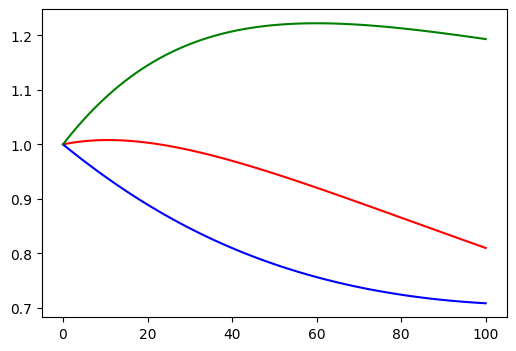

[0.81008262 0.70864606 1.19305615]


In [21]:
inp = np.ones(3)
result = runge_kuta(inp, 100, 0.01)
plot_results(result)
print(result[-1])

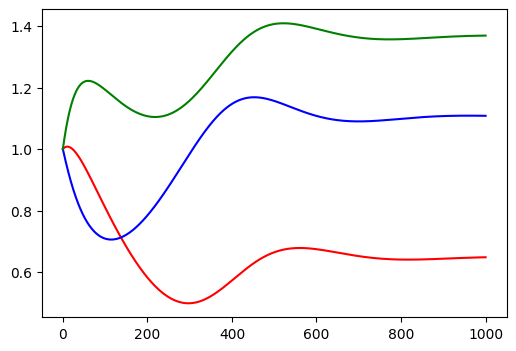

[0.64804007 1.1082517  1.36922524]


In [22]:
inp = np.ones(3)
result = runge_kuta(inp, 1000, 0.01)
plot_results(result)
print(result[-1])

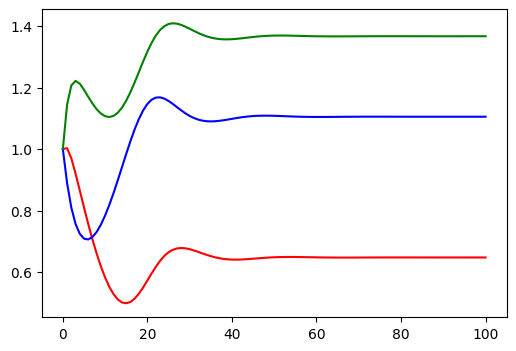

[0.64740054 1.1053002  1.36714351]


In [23]:
inp = np.ones(3)
result = runge_kuta(inp, 100, 0.2)
plot_results(result)
print(result[-1])

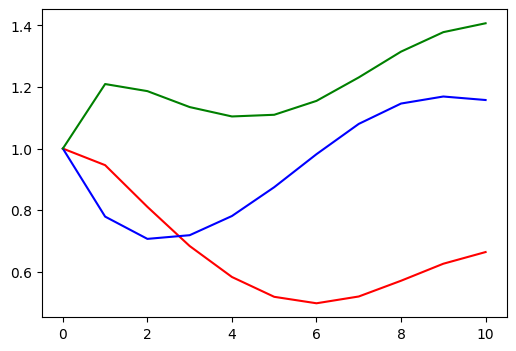

[0.66381948 1.15772474 1.40700895]


In [24]:
inp = np.ones(3)
result = runge_kuta(inp, 10, 0.5)
plot_results(result)
print(result[-1])

<font color=green size = 6>
Write anything that you interpreted in at most 5 line <br>
<font color=green size = 6>

Answer:

The system exhibits nonlinear dynamics with
x,
y and
z evolving differently over time

The step size
h significantly affects stability and accuracy with smaller
h yielding smoother curves

x decreases steadily while
y initially increases and then declines showing non monotonic behavior

z follows a similar pattern to
y but stabilizes at a higher value

Runge Kutta effectively captures the system’s behavior making it suitable for solving complex ODEs

Here is the newton raphson method for solving equations where J is jacobian matrix and F is the equation that we want to solve:
$$
\mathbf{x}_{n+1} = \mathbf{x}_n - J^{-1}(\mathbf{x}_n) \cdot F(\mathbf{x}_n)
$$

Use this method to solve this equation:
$$
x^2 + y^2 - 4 = 0
$$
$$
e^{x} + y - 1 = 0
$$


In [25]:
def F(x):
    return np.array([x[0]**2 + x[1]**2 - 4, np.exp(x[0]) + x[1] - 1])

def jacobian(x):
    return np.array([[2*x[0], 2*x[1]], [np.exp(x[0]), 1]])

def newton_raphson(x0, max_iter=10):
    x_values = [x0.copy()]
    for _ in range(max_iter):
        J = jacobian(x0)
        F_x = F(x0)
        dx = np.linalg.solve(J, -F_x)
        x0 += dx
        x_values.append(x0.copy())
    return np.array(x_values)

In [26]:
def plot_results(results):
    plt.figure(figsize=(6, 4))
    plt.plot(results[:, 0], color='blue', label='x')
    plt.plot(results[:, 1], color='orange', label='y')
    plt.show()

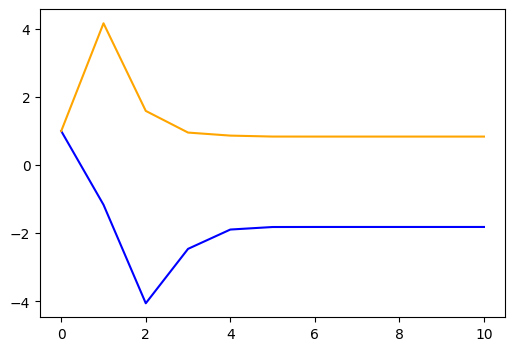

[-1.81626407  0.8373678 ]


In [27]:
#TODO
# init point [1,1], max_iter = 10
inp = np.array([1.0, 1.0])
result = newton_raphson(inp, 10)
plot_results(result)
print(result[-1])

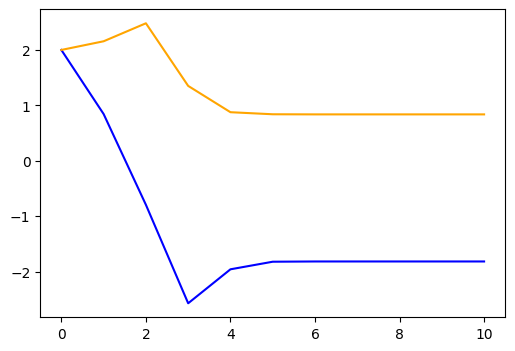

[-1.81626407  0.8373678 ]


In [28]:
#TODO
# init point [2,2], max_iter = 10
inp = np.array([2.0, 2.0])
result = newton_raphson(inp, 10)
plot_results(result)
print(result[-1])

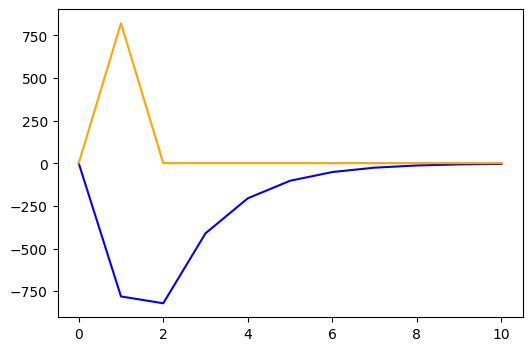

[-3.51432102  0.9943161 ]


In [29]:
#TODO
# init point [0.05,0.05], max_iter = 10
inp = np.array([0.05, 0.05])
result = newton_raphson(inp, 10)
plot_results(result)
print(result[-1])

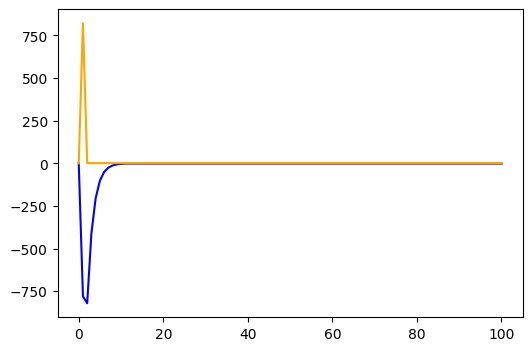

[-1.81626407  0.8373678 ]


In [30]:
#TODO
# init point [0.05,0.05], max_iter = 100
inp = np.array([0.05, 0.05])
result = newton_raphson(inp, 100)
plot_results(result)
print(result[-1])

<font color=green size = 6>
Write anything that you interpreted in at most 5 line <br>
<font color=green size = 6>

Answer:

The Newton Raphson method converges quickly for this system but exhibits oscillations in early iterations

The
x values decrease and stabilize around
−2 while
y initially rises and then flattens

The choice of the initial point significantly influences the trajectory and convergence speed

The method efficiently finds a root despite nonlinearities in the equations

A higher iteration count might refine the solution further reducing fluctuations